# 모델(LLM)

LLM(대규모 언어 모델)은 사람처럼 텍스트를 해석하고 생성할 수 있는 강력한 AI 도구입니다. 

각 작업에 대한 전문적인 훈련 없이도 콘텐츠 작성, 언어 번역, 요약 및 질문 응답에 사용할 수 있습니다.

텍스트 생성 외에도 많은 모델이 다음을 지원합니다

- 도구 호출: 외부 도구(데이터베이스 쿼리 또는 API 호출 등)를 호출하고 결과를 응답에 사용
- 구조화된 출력: 모델의 응답이 정의된 형식을 따르도록 제한
- 멀티모달리티: 이미지, 오디오, 비디오 등 텍스트가 아닌 데이터 처리 및 반환
- 추론: 결론에 도달하기 위한 다단계 추론 수행

## 환경 설정

LangGraph 튜토리얼을 시작하기 전에 필요한 환경을 설정합니다. `dotenv`를 사용하여 API 키를 로드하고, `langchain_teddynote`의 로깅 기능을 활성화하여 LangSmith에서 실행 추적을 확인할 수 있도록 합니다.

LangSmith 추적을 활성화하면 모델 호출 과정을 시각적으로 디버깅할 수 있어, 개발 및 문제 해결에 큰 도움이 됩니다.

아래 코드는 환경 변수를 로드하고 LangSmith 프로젝트를 설정합니다.

In [1]:
from dotenv import load_dotenv
from langchain_teddynote import logging

# 환경 변수 로드
load_dotenv(override=True)
# 추적을 위한 프로젝트 이름 설정
logging.langsmith("LangChain-V1-Tutorial")

LangSmith 추적을 시작합니다.
[프로젝트명]
LangChain-V1-Tutorial


## 모델 (Model)

LLM은 에이전트의 추론 엔진으로서, LangGraph 애플리케이션의 핵심 구성 요소입니다. LangChain은 다양한 모델 제공자를 통합하여 일관된 인터페이스를 제공하며, 간단하게 `provider:model` 형식의 문자열로 모델을 지정할 수 있습니다.

`init_chat_model` 함수를 사용하면 제공자와 모델명만으로 손쉽게 LLM 인스턴스를 생성할 수 있습니다. 이 방식은 빠른 프로토타이핑에 적합합니다.

아래 코드는 OpenAI의 gpt-4.1-mini 모델을 초기화합니다.

In [2]:
from langchain.chat_models import init_chat_model

# 모델 식별자 문자열을 사용한 간단한 방법
model = init_chat_model("openai:gpt-4.1-mini")

### 모델 세부 설정

더 세밀한 제어가 필요한 경우, 모델 클래스를 직접 인스턴스화하여 다양한 옵션을 설정할 수 있습니다. `temperature`는 응답의 무작위성을, `max_tokens`는 생성할 최대 토큰 수를 제어합니다.

**주요 초기화 인자**

| 파라미터 | 설명 |
|:---|:---|
| `model` | 사용할 OpenAI 모델 이름 |
| `temperature` | Sampling temperature (0에 가까울수록 결정적, 높을수록 창의적) |
| `max_tokens` | 생성할 최대 token 수 |
| `logprobs` | logprobs 반환 여부 |
| `stream_options` | Streaming 출력 설정 (예: `{"include_usage": True}`로 token 사용량 포함) |
| `timeout` | 요청 timeout (초 단위) |
| `max_retries` | 최대 재시도 횟수 |
| `api_key` | OpenAI API key (미지정 시 환경변수 `OPENAI_API_KEY`에서 읽음) |
| `base_url` | API 요청 base URL (proxy 또는 service emulator 사용 시에만 지정) |

아래 코드는 ChatOpenAI 클래스를 사용하여 세부 옵션을 설정한 모델을 생성합니다.

In [3]:
from langchain_openai import ChatOpenAI

# 모델 인스턴스를 직접 초기화하여 더 세밀한 제어
model = ChatOpenAI(
    model="gpt-4.1-mini",
    temperature=0.1,  # 응답의 무작위성 제어
    max_tokens=1000,  # 최대 생성 토큰 수
    timeout=30,  # 요청 타임아웃(초)
)

### Anthropic 모델 사용

Anthropic의 Claude 모델도 동일한 방식으로 사용할 수 있습니다. 환경 변수에 API 키가 설정되어 있어야 합니다.

```
ANTHROPIC_API_KEY="sk-ant-api03-..."
```

아래 코드는 Anthropic의 Claude Sonnet 모델을 초기화합니다.

In [ ]:
from langchain.chat_models import init_chat_model

model = init_chat_model("anthropic:claude-sonnet-4-5")

### 그 밖에 지원되는 모델 제공자

| 제공자 | 패키지 |
|:---|:---|
| `openai` | [`langchain-openai`](https://docs.langchain.com/oss/python/integrations/providers/openai) |
| `anthropic` | [`langchain-anthropic`](https://docs.langchain.com/oss/python/integrations/providers/anthropic) |
| `azure_openai` | [`langchain-openai`](https://docs.langchain.com/oss/python/integrations/providers/openai) |
| `azure_ai` | [`langchain-azure-ai`](https://docs.langchain.com/oss/python/integrations/providers/microsoft) |
| `google_vertexai` | [`langchain-google-vertexai`](https://docs.langchain.com/oss/python/integrations/providers/google) |
| `google_genai` | [`langchain-google-genai`](https://docs.langchain.com/oss/python/integrations/providers/google) |
| `bedrock` | [`langchain-aws`](https://docs.langchain.com/oss/python/integrations/providers/aws) |
| `bedrock_converse` | [`langchain-aws`](https://docs.langchain.com/oss/python/integrations/providers/aws) |
| `cohere` | [`langchain-cohere`](https://docs.langchain.com/oss/python/integrations/providers/cohere) |
| `fireworks` | [`langchain-fireworks`](https://docs.langchain.com/oss/python/integrations/providers/fireworks) |
| `together` | [`langchain-together`](https://docs.langchain.com/oss/python/integrations/providers/together) |
| `mistralai` | [`langchain-mistralai`](https://docs.langchain.com/oss/python/integrations/providers/mistralai) |
| `huggingface` | [`langchain-huggingface`](https://docs.langchain.com/oss/python/integrations/providers/huggingface) |
| `groq` | [`langchain-groq`](https://docs.langchain.com/oss/python/integrations/providers/groq) |
| `ollama` | [`langchain-ollama`](https://docs.langchain.com/oss/python/integrations/providers/ollama) |
| `google_anthropic_vertex` | [`langchain-google-vertexai`](https://docs.langchain.com/oss/python/integrations/providers/google) |
| `deepseek` | [`langchain-deepseek`](https://docs.langchain.com/oss/python/integrations/providers/deepseek) |
| `ibm` | [`langchain-ibm`](https://docs.langchain.com/oss/python/integrations/providers/deepseek) |
| `nvidia` | [`langchain-nvidia-ai-endpoints`](https://docs.langchain.com/oss/python/integrations/providers/nvidia) |
| `xai` | [`langchain-xai`](https://docs.langchain.com/oss/python/integrations/providers/xai) |
| `perplexity` | [`langchain-perplexity`](https://docs.langchain.com/oss/python/integrations/providers/perplexity) |

## 답변 출력: invoke()

`invoke()` 메서드는 모델에 메시지를 전달하고 응답을 받는 가장 기본적인 방법입니다. 이 메서드는 동기(synchronous) 방식으로 동작하며, 전체 응답이 생성될 때까지 기다렸다가 한 번에 결과를 반환합니다.

메시지는 튜플 형식 `(role, content)` 또는 메시지 객체로 전달할 수 있습니다. `system` 역할은 모델의 행동을 지시하고, `human` 역할은 사용자 입력을 나타냅니다.

아래 코드는 간단한 질문을 모델에 전달하고 응답을 출력합니다.

In [4]:
messages = [
    ("system", "You are a helpful assistant."),
    ("human", "대한민국의 수도는 어디야?"),
]

# invoke 호출
response = model.invoke(messages)
print(response)

content='대한민국의 수도는 서울입니다.' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 8, 'prompt_tokens': 25, 'total_tokens': 33, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4.1-mini-2025-04-14', 'system_fingerprint': 'fp_4c2851f862', 'id': 'chatcmpl-CeNPOEJrSaedT8jJuWxn3ImO9qrlc', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None} id='lc_run--9163477d-88a5-407f-be3e-b7773449e975-0' usage_metadata={'input_tokens': 25, 'output_tokens': 8, 'total_tokens': 33, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}


### 응답 구조

모델의 응답은 `AIMessage` 객체로 반환됩니다. `content` 속성에는 모델이 생성한 텍스트 답변이 포함되어 있습니다.

In [5]:
response.content

'대한민국의 수도는 서울입니다.'

### 토큰 사용량 정보

`usage_metadata` 속성에는 이번 호출에서 사용된 토큰 수가 포함됩니다. 입력 토큰(`input_tokens`), 출력 토큰(`output_tokens`), 총 토큰(`total_tokens`) 정보를 확인할 수 있습니다.

In [6]:
response.usage_metadata

{'input_tokens': 25,
 'output_tokens': 8,
 'total_tokens': 33,
 'input_token_details': {'audio': 0, 'cache_read': 0},
 'output_token_details': {'audio': 0, 'reasoning': 0}}

### 응답 메타데이터

`response_metadata` 속성에는 모델 제공자로부터 받은 상세 응답 정보가 포함됩니다. 모델명, 종료 사유(`finish_reason`), 서비스 티어 등의 정보를 확인할 수 있습니다.

In [7]:
response.response_metadata

{'token_usage': {'completion_tokens': 8,
  'prompt_tokens': 25,
  'total_tokens': 33,
  'completion_tokens_details': {'accepted_prediction_tokens': 0,
   'audio_tokens': 0,
   'reasoning_tokens': 0,
   'rejected_prediction_tokens': 0},
  'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}},
 'model_provider': 'openai',
 'model_name': 'gpt-4.1-mini-2025-04-14',
 'system_fingerprint': 'fp_4c2851f862',
 'id': 'chatcmpl-CeNPOEJrSaedT8jJuWxn3ImO9qrlc',
 'service_tier': 'default',
 'finish_reason': 'stop',
 'logprobs': None}

## 답변 스트리밍: stream()

`stream()` 메서드는 모델의 응답을 실시간으로 받아볼 수 있는 스트리밍 방식입니다. 전체 응답을 기다리지 않고 토큰이 생성되는 즉시 출력되므로, 사용자 경험을 크게 향상시킬 수 있습니다.

`stream()` 메서드는 generator 객체를 반환하며, `for` 루프를 통해 각 청크(chunk)를 순회하면서 실시간으로 응답을 출력할 수 있습니다.

아래 코드는 스트리밍 방식으로 모델 응답을 출력합니다.

In [9]:
for chunk in model.stream(messages):
    print(chunk.content, end="")

대한민국의 수도는 서울입니다.

### stream_response 헬퍼 함수

`langchain_teddynote` 패키지의 `stream_response` 함수를 사용하면 스트리밍 출력을 더 간단하게 처리할 수 있습니다. 이 함수는 내부적으로 스트림을 순회하며 응답을 깔끔하게 출력합니다.

아래 코드는 `stream_response` 함수를 사용한 스트리밍 예시입니다.

In [10]:
from langchain_teddynote.messages import stream_response

stream_response(model.stream(messages))

대한민국의 수도는 서울입니다.

## 비동기 처리: ainvoke()

`ainvoke()` 메서드는 비동기(asynchronous) 방식으로 모델을 호출합니다. Python의 `async/await` 구문과 함께 사용하며, 여러 모델 호출을 동시에 처리하거나 I/O 바운드 작업과 병렬로 실행할 때 유용합니다.

비동기 호출은 `await` 키워드를 사용하여 결과를 기다립니다. Jupyter 노트북에서는 최상위 수준에서 `await`를 직접 사용할 수 있습니다.

아래 코드는 비동기 방식으로 모델을 호출하는 예시입니다.

In [ ]:
# 비동기 호출
response = model.ainvoke(messages)

# 비동기 호출 대기
await response

AIMessage(content='대한민국의 수도는 서울입니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 8, 'prompt_tokens': 25, 'total_tokens': 33, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4.1-mini-2025-04-14', 'system_fingerprint': 'fp_4c2851f862', 'id': 'chatcmpl-CeNRozdY58oa9lS9uVfpqQu3UslxU', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--ba392b88-4d0f-46e4-af06-f9fbd7969a94-0', usage_metadata={'input_tokens': 25, 'output_tokens': 8, 'total_tokens': 33, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

## 비동기 스트리밍: astream()

`astream()` 메서드는 비동기 스트리밍을 지원합니다. `async for` 구문을 사용하여 비동기적으로 스트림을 순회하며, 각 청크가 도착할 때마다 처리할 수 있습니다.

비동기 스트리밍은 여러 스트림을 동시에 처리하거나, 스트리밍 중에 다른 비동기 작업을 병렬로 수행할 때 유용합니다.

아래 코드는 비동기 스트리밍 방식으로 모델 응답을 출력합니다.

In [12]:
# 비동기 스트리밍
async for chunk in model.astream(messages):
    print(chunk.content, end="")

대한민국의 수도는 서울입니다.

## 배치 요청: batch()

`batch()` 메서드는 여러 개의 독립적인 요청을 한 번에 처리합니다. 내부적으로 요청들이 병렬로 실행되므로, 다량의 데이터를 처리해야 할 때 순차 호출보다 훨씬 효율적입니다.

배치 처리는 대량의 텍스트 분류, 번역, 요약 등의 작업에서 처리 시간을 크게 단축할 수 있습니다.

아래 코드는 세 개의 질문을 동시에 처리하는 배치 요청 예시입니다.

In [14]:
# 여러 요청을 일괄 처리
responses = model.batch(
    [
        "대한민국의 수도는 어디야?",
        "캐나다의 수도는 어디야?",
        "미국의 수도는 어디야?",
    ]
)

for response in responses:
    print(response.content)
    print("---")

대한민국의 수도는 서울입니다.
---
캐나다의 수도는 오타와(Ottawa)입니다.
---
미국의 수도는 워싱턴 D.C.입니다.
---


## Tool Calling

Tool Calling은 LLM이 외부 도구(함수)를 호출할 수 있게 해주는 기능입니다. `bind_tools()` 메서드를 사용하여 모델에 도구를 바인딩하면, 모델은 사용자 질문에 따라 적절한 도구를 선택하고 필요한 인자를 생성합니다.

도구는 Pydantic 모델로 정의하며, 도구의 설명(`docstring`)과 필드 설명(`Field`)이 모델이 도구를 이해하는 데 중요한 역할을 합니다.

아래 코드는 날씨 조회 도구를 정의하고 모델에 바인딩하는 예시입니다.

In [17]:
from pydantic import BaseModel, Field


class GetWeather(BaseModel):
    """Get the current weather in a given location"""

    location: str = Field(..., description="The city and state, e.g. Seoul, Korea")


model_with_tools = model.bind_tools([GetWeather])
response = model_with_tools.invoke("서울의 날씨는 어때?")
print(response)

content='' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 67, 'total_tokens': 84, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4.1-mini-2025-04-14', 'system_fingerprint': 'fp_4c2851f862', 'id': 'chatcmpl-CeNZPIG2UbGSJVWe0WrI3N8TKan4I', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None} id='lc_run--e2a1dc16-bb86-4ffe-9e95-536d88360297-0' tool_calls=[{'name': 'GetWeather', 'args': {'location': 'Seoul, Korea'}, 'id': 'call_VtFX9A26HYm2IhXQM6BfgE9I', 'type': 'tool_call'}] usage_metadata={'input_tokens': 67, 'output_tokens': 17, 'total_tokens': 84, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}


### Tool Call 응답 구조

도구 호출이 발생하면 응답의 `content`는 빈 문자열이 됩니다. 대신 `tool_calls` 속성에 호출할 도구 정보가 포함됩니다.

`tool_calls`는 리스트 형태로, 각 항목에는 다음 정보가 포함됩니다:
- `name`: 호출할 도구 이름
- `args`: 도구에 전달할 인자
- `id`: 도구 호출의 고유 식별자 (ToolMessage 응답 시 필요)
- `type`: 호출 유형 (`tool_call`)

아래에서 도구 호출 정보를 확인할 수 있습니다.

In [ ]:
# 도구 호출 정보
response.tool_calls

[{'name': 'GetWeather',
  'args': {'location': 'Seoul, Korea'},
  'id': 'call_VtFX9A26HYm2IhXQM6BfgE9I',
  'type': 'tool_call'}]

## 정형화된 답변 출력 (Structured Output)

`with_structured_output()` 메서드를 사용하면 모델의 응답을 미리 정의한 스키마에 맞게 구조화할 수 있습니다. Pydantic 모델을 스키마로 전달하면, 모델은 해당 구조에 맞는 응답만 생성합니다.

이 기능은 정보 추출, 데이터 파싱, API 응답 생성 등 일관된 형식의 출력이 필요한 경우에 매우 유용합니다. 모델이 스키마를 벗어난 응답을 생성하지 않으므로 후처리가 간단해집니다.

아래 코드는 사용자 정보를 추출하여 구조화된 형태로 반환하는 예시입니다.

In [22]:
from pydantic import BaseModel, Field


class ResponseFormat(BaseModel):
    """답변 형식"""

    name: str = Field(description="Name of the person")
    email: str = Field(description="Email address of the person")
    phone: str | None = Field(description="Phone number of the person")


structured_model = model.with_structured_output(ResponseFormat)
result = structured_model.invoke(
    "다음의 정보로부터 답변을 출력하세요: 이름: 테디, 이메일: teddy@example.com, 전화번호: 010-1234-5678"
)
result

ResponseFormat(name='테디', email='teddy@example.com', phone='010-1234-5678')

## 토큰 사용량 추적

대규모 애플리케이션에서는 비용 관리를 위해 토큰 사용량을 추적하는 것이 중요합니다. `UsageMetadataCallbackHandler`를 사용하면 여러 모델 호출에 걸친 누적 토큰 사용량을 쉽게 추적할 수 있습니다.

콜백 핸들러는 `config` 매개변수를 통해 런타임에 주입되며, 호출이 완료될 때마다 사용량 정보가 자동으로 누적됩니다. 모델별로 구분된 사용량 통계를 확인할 수 있습니다.

아래 코드는 두 개의 서로 다른 모델 호출에서 토큰 사용량을 추적하는 예시입니다.

In [23]:
from langchain.chat_models import init_chat_model
from langchain_core.callbacks import UsageMetadataCallbackHandler

model_1 = init_chat_model(model="openai:gpt-4.1-mini")
model_2 = init_chat_model(model="openai:gpt-4.1-nano")

# 콜백 핸들러를 사용하여 토큰 사용량 추적
callback = UsageMetadataCallbackHandler()

# config에 콜백 핸들러를 추가하여 토큰 사용량 추적
result_1 = model_1.invoke("Hello", config={"callbacks": [callback]})
result_2 = model_2.invoke("Hello", config={"callbacks": [callback]})

callback.usage_metadata

{'gpt-4.1-mini-2025-04-14': {'input_tokens': 8,
  'output_tokens': 9,
  'total_tokens': 17,
  'input_token_details': {'audio': 0, 'cache_read': 0},
  'output_token_details': {'audio': 0, 'reasoning': 0}},
 'gpt-4.1-nano-2025-04-14': {'input_tokens': 8,
  'output_tokens': 9,
  'total_tokens': 17,
  'input_token_details': {'audio': 0, 'cache_read': 0},
  'output_token_details': {'audio': 0, 'reasoning': 0}}}

In [24]:
for i in range(3):
    model_1.invoke("Hello", config={"callbacks": [callback]})
    model_2.invoke("Hello", config={"callbacks": [callback]})

    print("토큰 사용량은 callback.usage_metadata에 누적됩니다.")
    print(callback.usage_metadata)

토큰 사용량은 callback.usage_metadata에 누적됩니다.
{'gpt-4.1-mini-2025-04-14': {'input_tokens': 16, 'output_tokens': 18, 'total_tokens': 34, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}, 'gpt-4.1-nano-2025-04-14': {'input_tokens': 16, 'output_tokens': 18, 'total_tokens': 34, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}}
토큰 사용량은 callback.usage_metadata에 누적됩니다.
{'gpt-4.1-mini-2025-04-14': {'input_tokens': 24, 'output_tokens': 27, 'total_tokens': 51, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}, 'gpt-4.1-nano-2025-04-14': {'input_tokens': 24, 'output_tokens': 27, 'total_tokens': 51, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}}
토큰 사용량은 callback.usage_metadata에 누적됩니다.
{'gpt-4.1-mini-2025-04-14': {'input_tokens': 32, 'output_tokens': 36, 'total_tokens': 

### 호출 시 config 전달

모델을 호출할 때 `config` 매개변수를 통해 추가 구성을 전달할 수 있습니다. 이를 통해 실행 동작, 콜백 및 메타데이터 추적을 런타임에 제어할 수 있습니다.

**주요 config 옵션:**
- `run_name`: 실행의 커스텀 이름 (LangSmith에서 식별용)
- `tags`: 분류 및 필터링을 위한 태그 목록
- `metadata`: 커스텀 메타데이터 (사용자 ID, 세션 정보 등)

아래 코드는 config를 사용하여 메타데이터와 함께 모델을 호출하는 예시입니다.

In [25]:
# 구성을 사용한 호출
response = model.invoke(
    "안녕! 반가워.",
    config={
        "run_name": "greetings",  # 이 실행의 커스텀 이름
        "tags": ["hi", "hello"],  # 분류를 위한 태그
        "metadata": {"user_id": "teddy"},  # 커스텀 메타데이터
    },
)

print(response.content)

안녕하세요! 반가워요. 어떻게 도와드릴까요?


Trace 링크: https://smith.langchain.com/public/d610868a-266b-46d2-929d-5a09677c56ce/r

## 추론 강도 조절: reasoning_effort

OpenAI의 최신 모델(gpt-5 등)은 `reasoning_effort` 옵션을 통해 추론의 깊이를 조절할 수 있습니다. 복잡한 문제에는 더 깊은 추론을, 간단한 질문에는 빠른 응답을 설정할 수 있어 비용과 품질 사이의 균형을 맞출 수 있습니다.

**reasoning_effort 옵션:**
- `minimal`: 최소한의 추론 (가장 빠름)
- `low`: 낮은 수준의 추론
- `medium`: 중간 수준의 추론 (균형)
- `high`: 깊은 추론 (가장 정확)

아래 코드는 medium 수준의 추론으로 모델을 설정하는 예시입니다.

In [ ]:
from langchain_openai import ChatOpenAI

# 모델 식별자 문자열을 사용한 간단한 방법
model = ChatOpenAI(
    model="gpt-5",
    temperature=0.1,
    reasoning_effort="medium",  # "minimal", "low", "medium", "high"
)

In [45]:
# 스트리밍 출력
for chunk in model.stream("지구가 둥근 이유에 대해서 설명해줘"):
    print(chunk.content, end="")

지구가 둥근 이유는 크게 “중력”과 “규모” 때문입니다.

- 중력이 모든 방향으로 고르게 당긴다: 물체가 충분히 크면 자기중력에 의해 물질이 중심을 향해 끌려가고, 전체 에너지가 가장 낮아지는 모양(동일한 부피에서 표면적이 최소인 모양)이 구형에 가깝습니다. 모서리나 돌출부는 중력이 더 많이 작용해 시간이 지나며 눌려 평탄해집니다.

- 초기 지구는 뜨겁고 유동적이었다: 형성 초기에 충돌과 방사성 붕괴로 거의 “녹은” 상태였고, 이때 중력이 모양을 빠르게 둥글게 만들었습니다. 지금은 단단해 보이지만, 지구 전체 규모에서는 바위도 매우 느리게 흐르는(점성 유동) 성질이 있어 장구한 시간에 걸쳐 둥근 형태를 유지합니다.

- 크기가 충분히 커야 한다: 천체가 작으면(지름 수백 km 이하) 암석의 강도가 중력보다 커서 감자처럼 울퉁불퉁할 수 있습니다. 하지만 지구처럼 큰 천체는 자중(자기 무게)이 암석 강도를 이겨 “정역학적 평형(둥근 상태)”에 도달합니다.

- 완벽한 구는 아니다: 자전 때문에 적도가 약간 부풀어 올라 “편평한 회전타원체”입니다(적도 반지름이 극보다 약 21 km 큼). 또 내부 밀도 불균질과 지형·해양 분포 때문에 중력이 미세하게 달라져, 평균 해수면을 기준으로 한 실제 형태는 ‘지오이드’라는 울퉁불퉁한 구형에 가깝습니다.

요약하면, 지구는 거대한 질량을 가진 유동적(지질학적 시간척도에서) 천체라서 중력이 모양을 거의 구로 만들고, 자전과 내부 구조가 그 구형을 약간 변형시킵니다.

## 멀티모달 LLM

최신 LLM들은 텍스트뿐만 아니라 이미지도 입력으로 받을 수 있습니다. `langchain_teddynote`의 `MultiModal` 클래스를 사용하면 이미지와 텍스트를 함께 처리하는 작업을 간단하게 수행할 수 있습니다.

멀티모달 기능은 이미지 분석, 차트 해석, 문서 이해 등 다양한 작업에 활용됩니다. 이미지는 URL 또는 로컬 파일 경로로 제공할 수 있습니다.

아래 코드는 이미지 인식이 가능한 모델로 MultiModal 객체를 생성합니다.

In [46]:
from langchain_teddynote.models import MultiModal
from langchain_teddynote.messages import stream_response

llm = ChatOpenAI(
    temperature=0.1,
    model="gpt-4.1",  # 이미지 인식이 가능한 모델
)

# 멀티모달(이미지 + 텍스트 처리) 객체 생성
multimodal = MultiModal(llm)


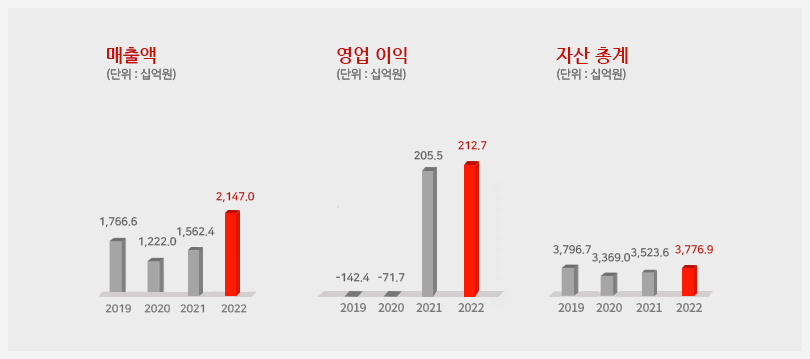

Certainly! This image presents three bar charts summarizing key financial metrics for a company over four years (2019–2022). The metrics are labeled in Korean, and the units are in billions of Korean Won (십억원).

Let's break down each chart:

---

### 1. **매출액 (Sales Revenue)**
- **2019:** 1,766.6
- **2020:** 1,222.0
- **2021:** 1,562.4
- **2022:** 2,147.0

**Analysis:**
- There was a significant drop in sales revenue from 2019 to 2020.
- Revenue rebounded in 2021 and saw a substantial increase in 2022, reaching its highest point in the four-year period.

---

### 2. **영업 이익 (Operating Profit)**
- **2019:** -142.4 (loss)
- **2020:** -71.7 (loss)
- **2021:** 205.5 (profit)
- **2022:** 212.7 (profit)

**Analysis:**
- The company experienced operating losses in 2019 and 2020.
- There was a turnaround in 2021, with a significant operating profit, which further increased in 2022.
- This indicates improved operational efficiency or increased profitability in recent years.

---

### 3. **자산 총계

In [47]:
# 웹상의 이미지 URL
IMAGE_URL = "https://wetalkotalk.oci.co.kr/images/sub/investment/graph_img_2022_kor.jpg"

# 웹 이미지를 직접 분석하여 스트리밍 응답 생성
answer = multimodal.stream(IMAGE_URL)

# 실시간으로 이미지 분석 결과 출력
stream_response(answer)

In [48]:
# 시스템 프롬프트: AI의 역할과 행동 방식을 정의
system_prompt = """You are a professional financial AI assistant specialized in analyzing financial statements and tables.
Your mission is to interpret given tabular financial data and provide insightful, interesting findings in a friendly and helpful manner.
Focus on key metrics, trends, and notable patterns that would be valuable for business analysis.

[IMPORTANT]
- 한글로 답변해 주세요.
"""

# 사용자 프롬프트: 구체적인 작업 지시사항
user_prompt = """Please analyze the financial statement provided in the image.
Identify and summarize the most interesting and important findings, including key financial metrics, trends, and insights that would be valuable for business decision-making."""

# 커스텀 프롬프트가 적용된 멀티모달 객체 생성
multimodal_llm_with_prompt = MultiModal(
    llm,
    system_prompt=system_prompt,  # 시스템 역할 정의
    user_prompt=user_prompt,  # 사용자 요청 정의
)


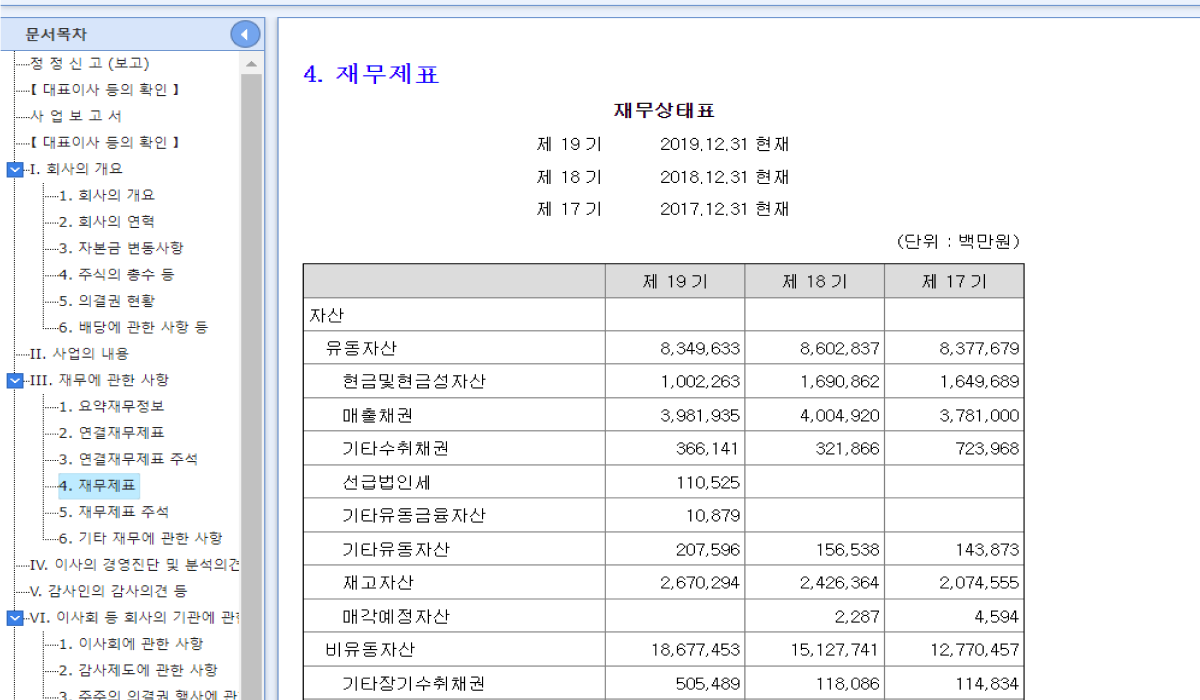

제공해주신 재무상태표(대차대조표)를 바탕으로 주요 재무 지표와 트렌드를 분석해드리겠습니다.

### 1. **자산 구성 및 변화**
- **유동자산**
  - 2017년: 8,377,679백만원
  - 2018년: 8,602,837백만원
  - 2019년: 8,349,633백만원
  - **분석:** 2018년에 소폭 증가했다가 2019년에 다시 감소했습니다. 전반적으로 큰 변동은 없으나, 2019년에는 현금 및 현금성 자산이 크게 감소(1,690,862 → 1,002,263백만원)한 점이 눈에 띕니다.

- **비유동자산**
  - 2017년: 12,770,457백만원
  - 2018년: 15,127,741백만원
  - 2019년: 18,677,453백만원
  - **분석:** 비유동자산이 꾸준히 증가하고 있습니다. 특히 2019년에 큰 폭으로 증가(약 3.5조원)하였으며, 이는 장기적 투자나 설비 확장, 혹은 무형자산 증가 등으로 해석될 수 있습니다.

### 2. **세부 항목별 주요 변화**
- **현금 및 현금성 자산**
  - 2018년 대비 2019년에 약 40% 감소(1,690,862 → 1,002,263백만원)하였습니다. 이는 투자, 부채 상환, 대규모 지출 등이 있었을 가능성을 시사합니다.
- **매출채권**
  - 2018년 대비 2019년에 소폭 감소(4,004,920 → 3,981,935백만원)하였으나, 전반적으로 안정적인 수준을 유지하고 있습니다.
- **재고자산**
  - 2017년부터 2019년까지 꾸준히 증가(2,074,555 → 2,670,294백만원)하고 있습니다. 이는 매출 증가에 따른 재고 확충, 혹은 재고 회전율 저하의 신호일 수 있습니다.

### 3. **종합 분석 및 인사이트**
- **비유동자산의 급격한 증가**는 회사가 장기적 성장에 투자하고 있음을 보여줍니다. 설비 투자, 장기 금융자산, 무형자산 등이 늘어난 것으로 추정됩니다.
- **현금성 자산의 감소**는 유동성 관리에 주의가 필요함을 시사합니다. 현금 유

In [49]:
# 분석할 재무제표 이미지 URL
IMAGE_PATH_FROM_FILE = "https://storage.googleapis.com/static.fastcampus.co.kr/prod/uploads/202212/080345-661/kwon-01.png"

# 커스텀 프롬프트가 적용된 멀티모달 LLM으로 재무제표 분석
answer = multimodal_llm_with_prompt.stream(IMAGE_PATH_FROM_FILE)

# 재무제표 분석 결과를 실시간으로 출력
stream_response(answer)

## 토큰 확률 분포: Logprobs

`logprobs` 옵션을 활성화하면 모델이 각 토큰을 생성할 때의 확률 분포를 확인할 수 있습니다. 이는 모델의 확신도를 측정하거나 불확실성을 분석하는 데 유용합니다.

`langchain_teddynote`의 `extract_token_probabilities` 함수를 사용하면 로그 확률을 백분율로 변환하여 직관적으로 확인할 수 있습니다.

아래 코드는 예/아니오 질문에 대한 모델의 확신도를 확인하는 예시입니다.

In [54]:
from langchain_openai import ChatOpenAI
from langchain_teddynote.messages import extract_token_probabilities

llm = ChatOpenAI(
    temperature=0.1,
    model="gpt-4.1",  # 이미지 인식이 가능한 모델
)

logprobs_model = llm.bind(logprobs=True)

# 토큰당 확률 분포 추출
logprobs_model = logprobs_model | extract_token_probabilities

In [58]:
logprobs_model.invoke("대한민국의 수도는 부산입니까? 1: 예, 0: 아니오. 1 or 0 으로 답변해주세요.")

0         	| 100.0%


{'tokens': ['0'], 'probabilities': [100.0]}

## OpenAI 호환 API 사용

LangChain의 `ChatOpenAI` 클래스는 OpenAI API 형식을 따르는 다양한 서비스와 호환됩니다. `base_url`을 변경하여 LM Studio, vLLM, Ollama 등의 로컬 서버나 다른 호환 서비스에 연결할 수 있습니다.

이 기능을 활용하면 동일한 코드로 다양한 모델 제공자를 사용할 수 있어, 개발 및 테스트 환경에서 유연성을 확보할 수 있습니다.

아래는 LM Studio와 vLLM에 연결하는 예시 코드입니다.

In [ ]:
# LM Studio 예시
# model = ChatOpenAI(
#     base_url="http://localhost:1234/v1",
#     api_key="lm-studio",
#     model="mlx-community/QwQ-32B-4bit",
#     extra_body={"ttl": 300}
# )

# vLLM 예시
# model = ChatOpenAI(
#     base_url="http://localhost:8000/v1",
#     api_key="EMPTY",
#     model="meta-llama/Llama-2-7b-chat-hf",
#     extra_body={"use_beam_search": True, "best_of": 4}
# )

### 파라미터 구분: model_kwargs vs extra_body

OpenAI 호환 API를 사용할 때, 파라미터 전달 방식에 따라 두 가지 옵션을 사용합니다.

**`model_kwargs` 사용:**
- 표준 OpenAI API 파라미터
- 최상위 요청 payload에 병합되는 파라미터
- 예: `stream_options`, `max_completion_tokens`

**`extra_body` 사용:**
- OpenAI 호환 provider의 커스텀 파라미터
- 제공자별 고유 기능을 활성화할 때 사용
- 예: vLLM의 `use_beam_search`, `best_of`

아래는 각 방식의 사용 예시입니다.

In [ ]:
# model_kwargs 예시
# model = ChatOpenAI(
#     model="gpt-4o",
#     model_kwargs={
#         "stream_options": {"include_usage": True},
#         "max_completion_tokens": 300,
#     }
# )

# extra_body 예시
# model = ChatOpenAI(
#     base_url="http://localhost:8000/v1",
#     extra_body={
#         "use_beam_search": True,
#         "best_of": 4,
#     }
# )